# CAFE SALES DATASET

# Introduction
This dataset captures 10,000 individual retail transactions, offering a rich snapshot of customer purchasing behavior across various food and beverage items.
Each row represents a unique transaction, with detailed attributes that enable both descriptive and inferential analysis.

# Read Data if it is csv
- Readind data using pandas is commonly done with the read_function.
- Here are the most frequently used method to read data into a pandas Dataframe.
- Reading csv file as pd.read_csv('filename.csv')

In [2]:
import pandas as pd
df=pd.read_csv("Dirty_Cafe1.csv")
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


# Summary of the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


# Descriptive Statistics

In [4]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


# Finding the Data Type

In [5]:
df.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

# Converting Object into Numeric

In [6]:
df['Quantity']=pd.to_numeric(df['Quantity'],errors='coerce')

In [7]:
df.describe()

,Quantity
count,9521.000000
mean,3.028463
std,1.419007
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [8]:
df['Price Per Unit']=pd.to_numeric(df['Price Per Unit'],errors='coerce')
df['Total Spent']=pd.to_numeric(df['Total Spent'],errors='coerce')


In [9]:
df.describe()

,Quantity,Price Per Unit,Total Spent
count,9521.000000,9467.000000,9498.000000
mean,3.028463,2.949984,8.924352
std,1.419007,1.278450,6.009919
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9667 non-null   object 
 2   Quantity          9521 non-null   float64
 3   Price Per Unit    9467 non-null   float64
 4   Total Spent       9498 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


## Checking the null values in Dataset

In [11]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [12]:
df.isnull().sum().sum()

np.int64(7850)

## import numpy to numeric condition

In [13]:
import numpy as np
import datetime as dt
np.mean(df[['Quantity','Price Per Unit','Total Spent']],axis=0)

Quantity          3.028463
Price Per Unit    2.949984
Total Spent       8.924352
dtype: float64

## check the mean values in column index

In [14]:
df[['Quantity','Price Per Unit','Total Spent']].mean()

Quantity          3.028463
Price Per Unit    2.949984
Total Spent       8.924352
dtype: float64

## using fillna to fill the null value

In [15]:
 df['Quantity'].fillna(df['Quantity'].mean(),inplace=True)
df['Price Per Unit'].fillna(df['Price Per Unit'].mean(),inplace=True)
df['Total Spent'].fillna(df['Total Spent'].mean(),inplace=True)

C:\Users\haris\AppData\Local\Temp\ipykernel_10848\3435265887.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(df['Quantity'].mean(),inplace=True)
C:\Users\haris\AppData\Local\Temp\ipykernel_10848\3435265887.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [16]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [17]:
df[['Item','Payment Method','Location','Transaction Date']].mode()

,Item,Payment Method,Location,Transaction Date
0,Juice,Digital Wallet,Takeaway,UNKNOWN


In [18]:
df['Item'].fillna(df['Item'].mode()[0],inplace=True)
df['Payment Method'].fillna(df['Payment Method'].mode()[0],inplace=True)
df['Location'].fillna(df['Location'].mode()[0],inplace=True)

C:\Users\haris\AppData\Local\Temp\ipykernel_10848\1712478151.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item'].fillna(df['Item'].mode()[0],inplace=True)
C:\Users\haris\AppData\Local\Temp\ipykernel_10848\1712478151.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [19]:
df.isnull().sum()

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    159
dtype: int64

#  Replace 'ERROR' and 'UNKNOWN' with NaN

In [20]:

df['Transaction Date'] = df['Transaction Date'].replace(['ERROR', 'UNKNOWN'], np.nan)
# Forward fill (uses previous valid date)
df['Transaction Date'] = df['Transaction Date'].fillna(method='ffill')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

C:\Users\haris\AppData\Local\Temp\ipykernel_10848\2943403895.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Transaction Date'] = df['Transaction Date'].fillna(method='ffill')


In [21]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.000000,4.000000,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.000000,12.000000,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.000000,8.924352,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.000000,10.000000,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.000000,4.000000,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.000000,4.000000,Digital Wallet,UNKNOWN,2023-08-30
9996,TXN_9659401,Juice,3.0,2.949984,3.000000,Digital Wallet,Takeaway,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.000000,8.000000,Digital Wallet,Takeaway,2023-03-02
9998,TXN_7695629,Cookie,3.0,2.949984,3.000000,Digital Wallet,Takeaway,2023-12-02


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [23]:
df.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

## Round_off columns values

In [24]:
roundoff_columns=['Price Per Unit','Total Spent']

In [25]:
df[roundoff_columns] = df[roundoff_columns].apply(lambda x:x.round(2))

In [26]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.00,4.00,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.00,12.00,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.00,8.92,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.00,10.00,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.00,4.00,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.00,4.00,Digital Wallet,UNKNOWN,2023-08-30
9996,TXN_9659401,Juice,3.0,2.95,3.00,Digital Wallet,Takeaway,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.00,8.00,Digital Wallet,Takeaway,2023-03-02
9998,TXN_7695629,Cookie,3.0,2.95,3.00,Digital Wallet,Takeaway,2023-12-02


## Changing the datatype in Dataset

In [27]:
df['Quantity'] = df['Quantity'].astype(int)

In [28]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.00,4.00,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.00,12.00,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.00,8.92,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.00,10.00,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.00,4.00,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.00,4.00,Digital Wallet,UNKNOWN,2023-08-30
9996,TXN_9659401,Juice,3,2.95,3.00,Digital Wallet,Takeaway,2023-06-02
9997,TXN_5255387,Coffee,4,2.00,8.00,Digital Wallet,Takeaway,2023-03-02
9998,TXN_7695629,Cookie,3,2.95,3.00,Digital Wallet,Takeaway,2023-12-02


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          10000 non-null  int64         
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 625.1+ KB


## To check the Dataset shape

In [30]:
df.shape

(10000, 8)

## Replace the UNKNOWN AND ERROR Values in dataset

In [31]:
df['Payment Method'] = df['Payment Method'].replace('UNKNOWN', 'Digital Wallet')
df['Location'] = df['Location'].replace('UNKNOWN', 'Takeaway')
df['Item'] = df['Item'].replace('UNKNOWN', 'Juice')
df['Payment Method'] = df['Payment Method'].replace('ERROR', 'Digital Wallet')
df['Location'] = df['Location'].replace('ERROR', 'Takeaway')
df['Item'] = df['Item'].replace('ERROR', 'Juice')

In [32]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.00,4.00,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.00,12.00,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.00,8.92,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.00,10.00,Digital Wallet,Takeaway,2023-04-27
4,TXN_3160411,Coffee,2,2.00,4.00,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.00,4.00,Digital Wallet,Takeaway,2023-08-30
9996,TXN_9659401,Juice,3,2.95,3.00,Digital Wallet,Takeaway,2023-06-02
9997,TXN_5255387,Coffee,4,2.00,8.00,Digital Wallet,Takeaway,2023-03-02
9998,TXN_7695629,Cookie,3,2.95,3.00,Digital Wallet,Takeaway,2023-12-02


## Adding new columns to Analysis a datset in various conditions

In [33]:
df['Day_of_Week'] = df['Transaction Date'].dt.day_name()  # Adds day name

In [34]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day_of_Week
0,TXN_1961373,Coffee,2,2.00,4.00,Credit Card,Takeaway,2023-09-08,Friday
1,TXN_4977031,Cake,4,3.00,12.00,Cash,In-store,2023-05-16,Tuesday
2,TXN_4271903,Cookie,4,1.00,8.92,Credit Card,In-store,2023-07-19,Wednesday
3,TXN_7034554,Salad,2,5.00,10.00,Digital Wallet,Takeaway,2023-04-27,Thursday
4,TXN_3160411,Coffee,2,2.00,4.00,Digital Wallet,In-store,2023-06-11,Sunday
...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.00,4.00,Digital Wallet,Takeaway,2023-08-30,Wednesday
9996,TXN_9659401,Juice,3,2.95,3.00,Digital Wallet,Takeaway,2023-06-02,Friday
9997,TXN_5255387,Coffee,4,2.00,8.00,Digital Wallet,Takeaway,2023-03-02,Thursday
9998,TXN_7695629,Cookie,3,2.95,3.00,Digital Wallet,Takeaway,2023-12-02,Saturday


In [35]:
df['Transaction Month'] = df['Transaction Date'].dt.month_name()
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day_of_Week,Transaction Month
0,TXN_1961373,Coffee,2,2.00,4.00,Credit Card,Takeaway,2023-09-08,Friday,September
1,TXN_4977031,Cake,4,3.00,12.00,Cash,In-store,2023-05-16,Tuesday,May
2,TXN_4271903,Cookie,4,1.00,8.92,Credit Card,In-store,2023-07-19,Wednesday,July
3,TXN_7034554,Salad,2,5.00,10.00,Digital Wallet,Takeaway,2023-04-27,Thursday,April
4,TXN_3160411,Coffee,2,2.00,4.00,Digital Wallet,In-store,2023-06-11,Sunday,June
...,...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.00,4.00,Digital Wallet,Takeaway,2023-08-30,Wednesday,August
9996,TXN_9659401,Juice,3,2.95,3.00,Digital Wallet,Takeaway,2023-06-02,Friday,June
9997,TXN_5255387,Coffee,4,2.00,8.00,Digital Wallet,Takeaway,2023-03-02,Thursday,March
9998,TXN_7695629,Cookie,3,2.95,3.00,Digital Wallet,Takeaway,2023-12-02,Saturday,December


In [36]:
df.shape

(10000, 10)

## Check for outliers

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

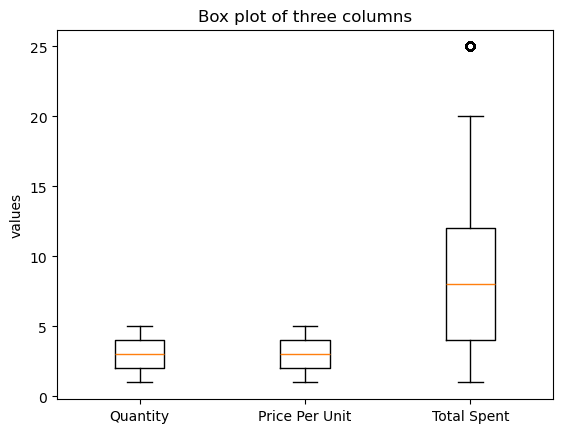

In [38]:
plt.boxplot(df[['Quantity','Price Per Unit','Total Spent']])
plt.xticks([1,2,3],['Quantity','Price Per Unit','Total Spent'])
plt.ylabel('values')
plt.title('Box plot of three columns')
plt.show()

## Finding the unique values

In [39]:
df['Total Spent'].unique()

array([ 4.  , 12.  ,  8.92, 10.  , 20.  ,  9.  , 16.  , 15.  , 25.  ,
        8.  ,  5.  ,  3.  ,  6.  ,  2.  ,  1.  ,  7.5 ,  4.5 ,  1.5 ])

In [40]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day_of_Week,Transaction Month
0,TXN_1961373,Coffee,2,2.00,4.00,Credit Card,Takeaway,2023-09-08,Friday,September
1,TXN_4977031,Cake,4,3.00,12.00,Cash,In-store,2023-05-16,Tuesday,May
2,TXN_4271903,Cookie,4,1.00,8.92,Credit Card,In-store,2023-07-19,Wednesday,July
3,TXN_7034554,Salad,2,5.00,10.00,Digital Wallet,Takeaway,2023-04-27,Thursday,April
4,TXN_3160411,Coffee,2,2.00,4.00,Digital Wallet,In-store,2023-06-11,Sunday,June
...,...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.00,4.00,Digital Wallet,Takeaway,2023-08-30,Wednesday,August
9996,TXN_9659401,Juice,3,2.95,3.00,Digital Wallet,Takeaway,2023-06-02,Friday,June
9997,TXN_5255387,Coffee,4,2.00,8.00,Digital Wallet,Takeaway,2023-03-02,Thursday,March
9998,TXN_7695629,Cookie,3,2.95,3.00,Digital Wallet,Takeaway,2023-12-02,Saturday,December


In [41]:
df.to_csv("Cafe_Sales1.csv")

## Exploratory Data Analysis (EDA) 
## Using Univariate Analysis, Bivariate Analysis and multivariate Analysis

## Univariate Analysis
- 1. First Numeric columns Analysis using Histogram Plot for describe.
- 2. Second Categorical Columns Analysis using count plot for Value Count. 

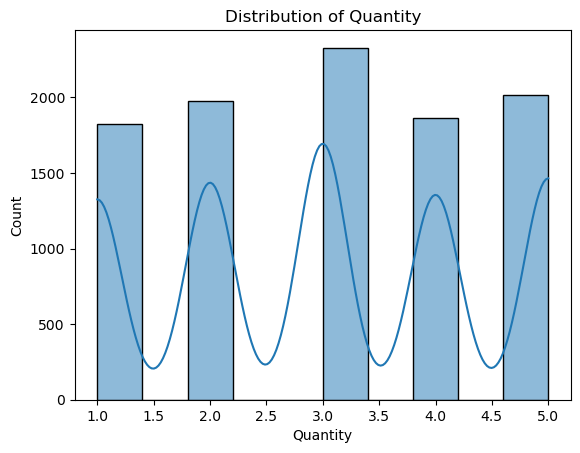

count    10000.000000
mean         3.027100
std          1.384614
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Quantity, dtype: float64


In [42]:
# Histogram with KDE
sns.histplot(df["Quantity"], kde=True, bins=10)
plt.title("Distribution of Quantity")
plt.show()
print(df["Quantity"].describe())


# Insights
- Quantity 3 is the most frequently purchased (highest bar).
- Quantity 1 and 4 are the least purchased compared to other quantities.
- Quantities 2 and 5 are also quite popular, close to each other.
- The distribution looks balanced overall, but with a clear peak at 3.
- Customers rarely go below 1 or above 5, meaning purchases are mostly in small batches.

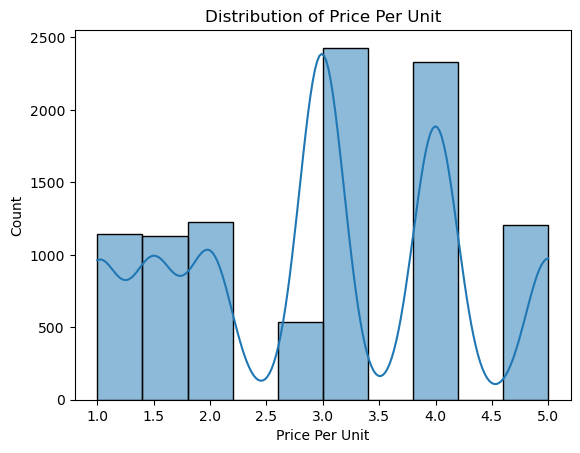

count    10000.000000
mean         2.949985
std          1.243910
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Price Per Unit, dtype: float64


In [55]:
sns.histplot(df["Price Per Unit"], kde=True, bins=10)
plt.title("Distribution of Price Per Unit")
plt.show()
print(df["Price Per Unit"].describe())

# Insights
- Price per unit = 3 and 4 are the most common (highest counts).
- Price per unit = 1, 2, and 5 are less frequent but still significant.
- Very few items fall around 2.5 (clear dip in the distribution).
- The overall distribution is not uniform → some prices are much more popular.
- Customers seem to prefer moderate prices (3–4) rather than very low (1) or very high (5).

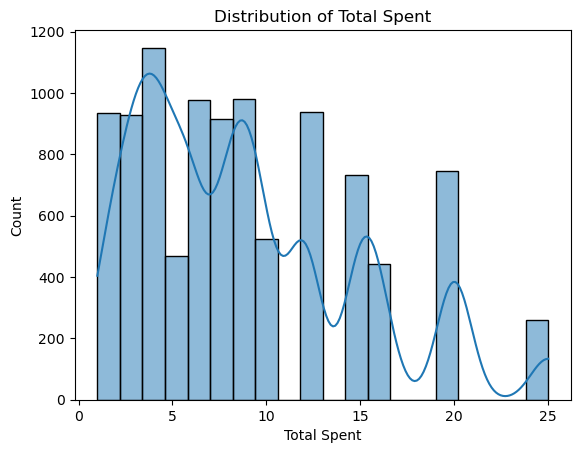

count    10000.000000
mean         8.924134
std          5.857113
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         25.000000
Name: Total Spent, dtype: float64


In [56]:
sns.histplot(df["Total Spent"], kde=True, bins=20)
plt.title("Distribution of Total Spent")
plt.show()
print(df["Total Spent"].describe())

# Insights
- Most people spend between ₹0–₹5.
- Fewer people spend more than ₹5.
- There are small peaks around ₹10, ₹15, and ₹20.
- Very few people spend above ₹20.

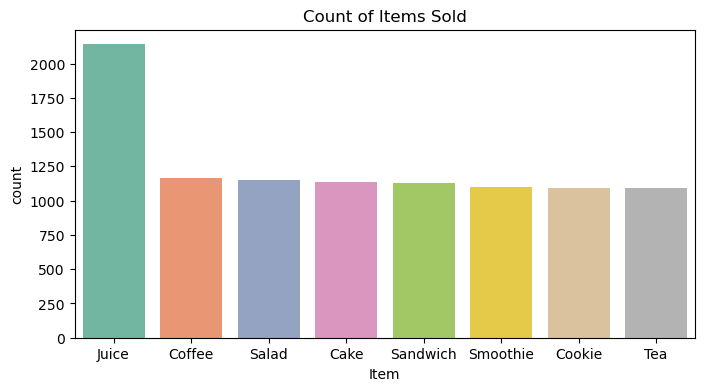

Item
Juice       2140
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
Name: count, dtype: int64


In [63]:
plt.figure(figsize=(8,4))
sns.countplot(x="Item", data=df, order=df["Item"].value_counts().index,palette="Set2")
plt.title("Count of Items Sold")
plt.show()
print(df["Item"].value_counts())

# Insights
- Juice is the most sold item.
- Coffee is the second most popular.
- Salad, Cake, and Sandwich are sold in similar amounts.
- Smoothie, Cookie, and Tea are the least sold.

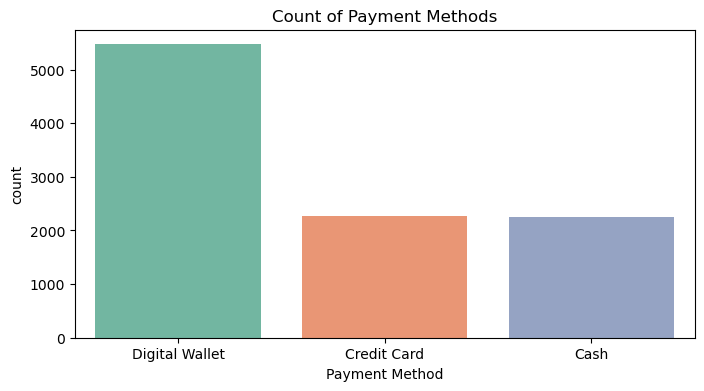

Payment Method
Digital Wallet    54.69
Credit Card       22.73
Cash              22.58
Name: proportion, dtype: float64


In [64]:
plt.figure(figsize=(8,4))
sns.countplot(x="Payment Method", data=df, order=df["Payment Method"].value_counts().index,palette="Set2")
plt.title("Count of Payment Methods")
plt.show()
print(df["Payment Method"].value_counts(normalize=True)*100)

# Insights
- Digital Wallet is used the most.
- Credit Card is used less than Digital Wallet.
- Cash is the least used.

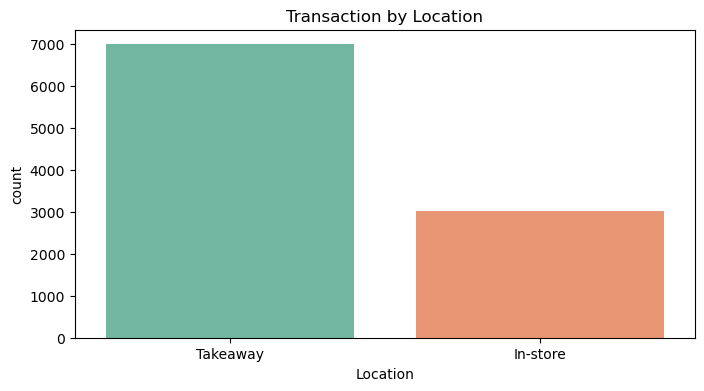

Location
Takeaway    6983
In-store    3017
Name: count, dtype: int64


In [65]:
plt.figure(figsize=(8,4))
sns.countplot(x="Location", data=df,palette='Set2')
plt.title("Transaction by Location")
plt.show()
print(df["Location"].value_counts())

# Insights
- Takeaway has more transactions than In-store.
- In-store transactions are about half of Takeaway.

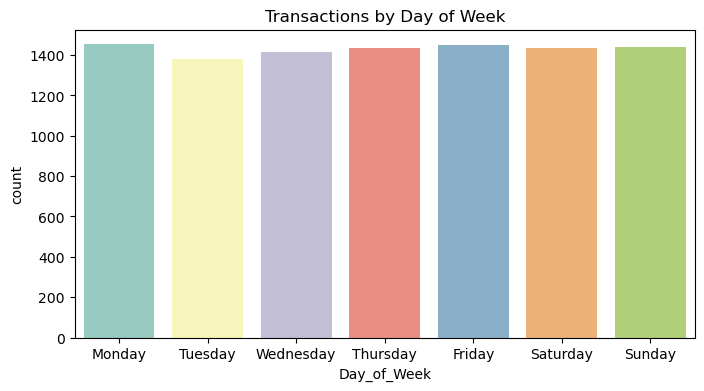

In [67]:
plt.figure(figsize=(8,4))
sns.countplot(x="Day_of_Week", data=df, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],palette='Set3')
plt.title("Transactions by Day of Week")
plt.show()

# Insights
- All days have similar number of transactions.
- No big difference between weekdays and weekends.
- Business is steady every day.

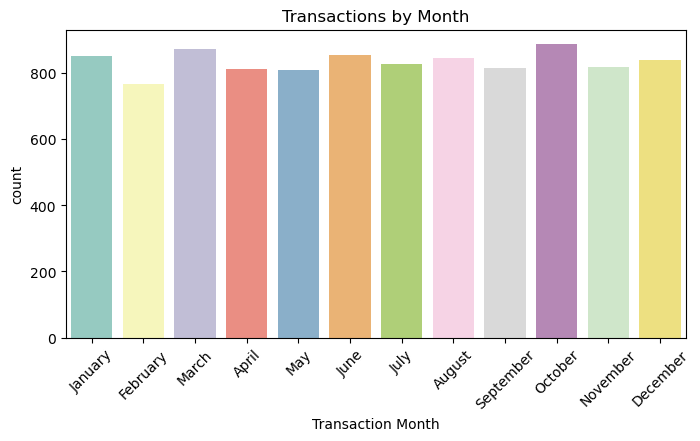

In [69]:
plt.figure(figsize=(8,4))
sns.countplot(x="Transaction Month", data=df, order=["January","February","March","April","May","June","July","August","September","October","November","December"],palette='Set3')
plt.title("Transactions by Month")
plt.xticks(rotation=45)
plt.show()


# Insights
- October has the most transactions.
- February has the fewest.
- Other months are mostly similar.

## Bivariate Analysis

In [67]:
##Bivariate Analysis
df.groupby('Item')['Total Spent'].mean()

Item
Cake         9.120211
Coffee       6.206009
Cookie       3.276960
Juice        8.744168
Salad       11.343937
Sandwich    11.975880
Smoothie    12.042190
Tea          4.741653
Name: Total Spent, dtype: float64

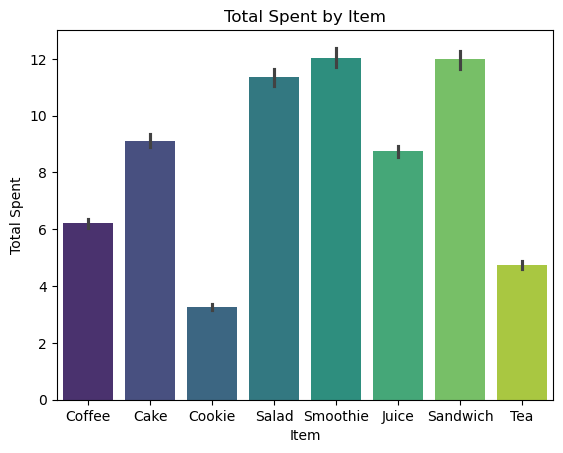

In [68]:
sns.barplot(x='Item', y='Total Spent', data=df,palette='viridis')
plt.title('Total Spent by Item')
plt.show()

# Insights
- Smoothie and Sandwich have the highest spending.
- Salad and Cake also have good spending.
- Coffee and Juice are in the middle.
- Cookie and Tea have the lowest spending.



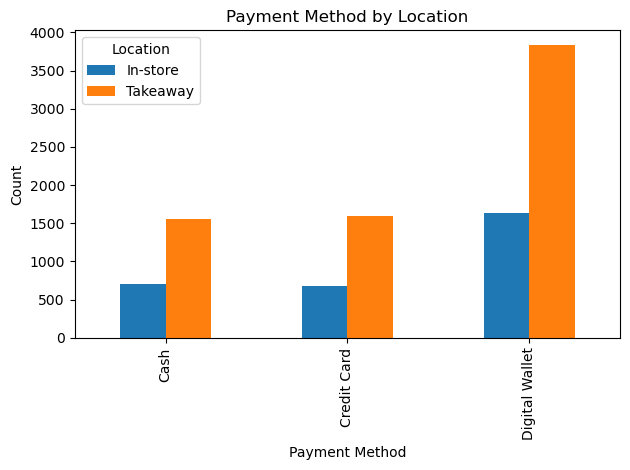

In [70]:
ct = pd.crosstab(df['Payment Method'], df['Location'])
ct.plot(kind='bar')
plt.title('Payment Method by Location')
plt.ylabel('Count')
plt.xlabel('Payment Method')
plt.legend(title='Location')
plt.tight_layout()
plt.show()

# Insights
- Takeaway uses more Cash and Credit Card than In-store.
- Digital Wallet is used the most, especially in Takeaway.
- In-store has fewer payments for all methods.



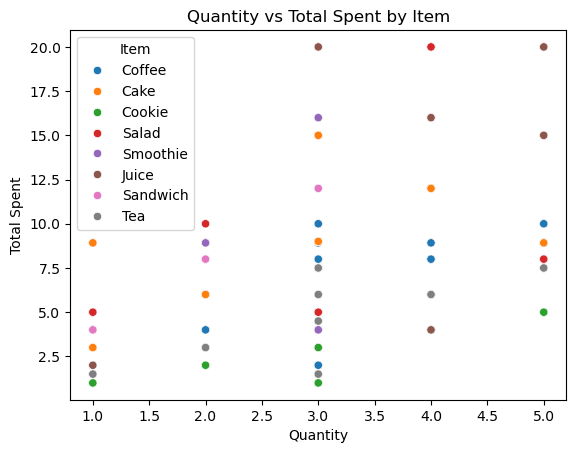

In [72]:
#Numerical vs Numerical
sns.scatterplot(data=df, x='Quantity', y='Total Spent', hue='Item')
plt.title('Quantity vs Total Spent by Item')
plt.show()

# Insights
- More quantity usually means more total spent.
- Juice and Sandwich often lead to high spending.
- Cookie and Tea have low spending even at higher quantities.
- Salad and Cake show medium spending.



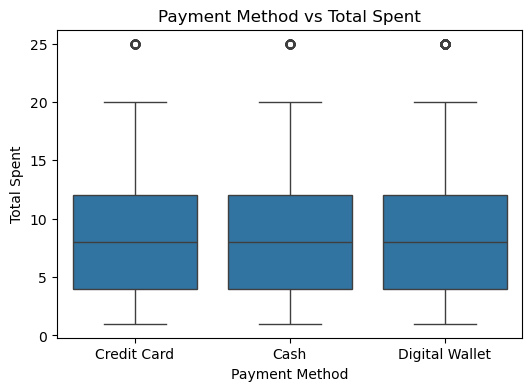

In [43]:
# Categorical vs Numerical
plt.figure(figsize=(6,4))
sns.boxplot(x="Payment Method", y="Total Spent", data=df)
plt.title("Payment Method vs Total Spent")
plt.show()

# Insights
- Credit Card, Cash, and Digital Wallet all have similar spending.
- Most people spend between ₹5 and ₹15.
- A few people spend more than ₹20 (outliers).

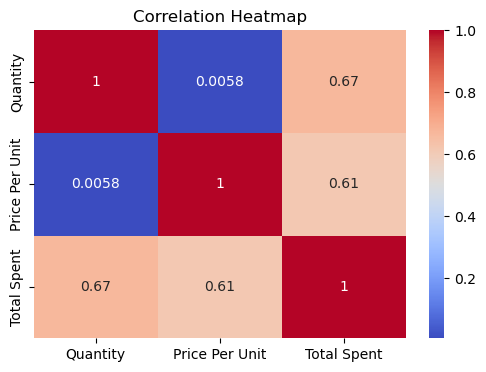

In [44]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[["Quantity", "Price Per Unit", "Total Spent"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Insights
-  More quantity → more total spent (strong link).
- Higher price per unit → more total spent (strong link).
- Quantity and price per unit are not related.



# Multivariate Analysis

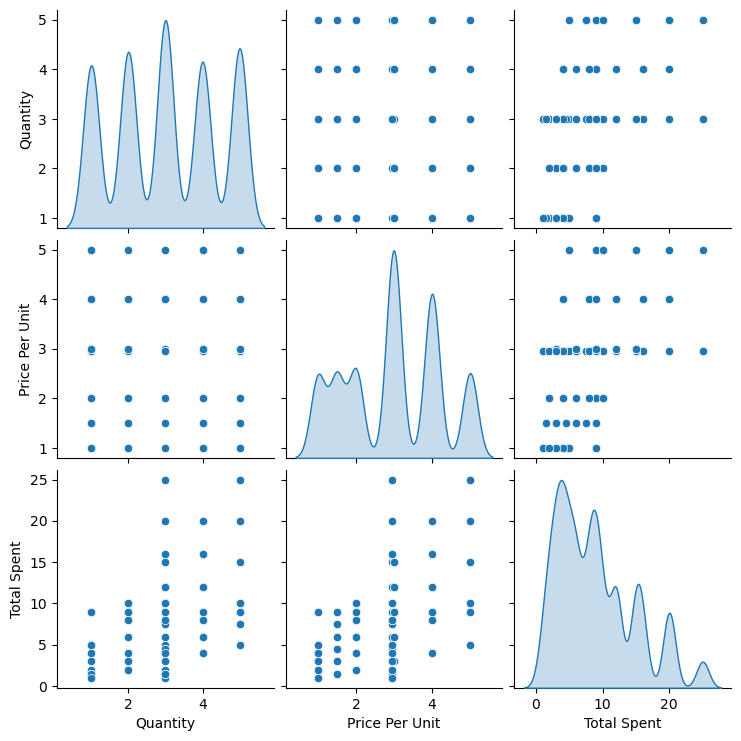

In [45]:
# Pairplot for multiple variables
sns.pairplot(df[["Quantity", "Price Per Unit", "Total Spent"]], diag_kind="kde")
plt.show()

# Insights
- Quantity and Price Per Unit have no clear pattern.
- Total Spent increases when Quantity or Price Per Unit goes up.
- Total Spent shows a clear spread—some people spend a lot, some very little.
- Quantity and Price Per Unit have their own peaks (popular values).



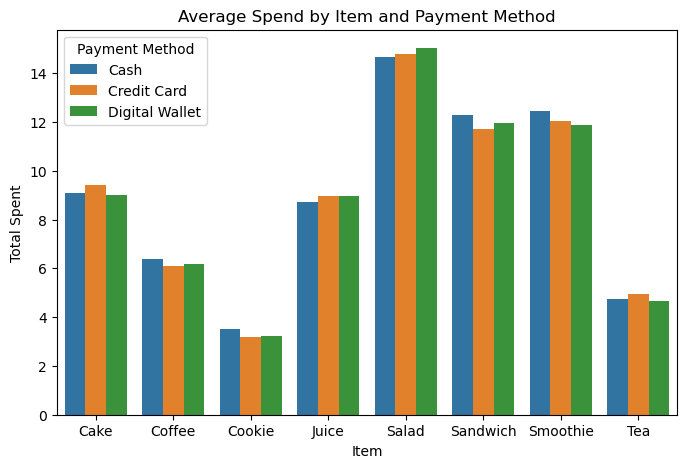

In [46]:
# Grouping analysis
grouped = df.groupby(["Item", "Payment Method"])["Total Spent"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x="Item", y="Total Spent", hue="Payment Method", data=grouped)
plt.title("Average Spend by Item and Payment Method")
plt.show()

# Insights
-  Salad has the highest average spend.
- Cookie and Tea have the lowest spend.
- Cake, Sandwich, and Smoothie also have high spend.
- All payment methods show similar spending for most items.
- Cash is slightly higher for some items like Juice and Smoothie.



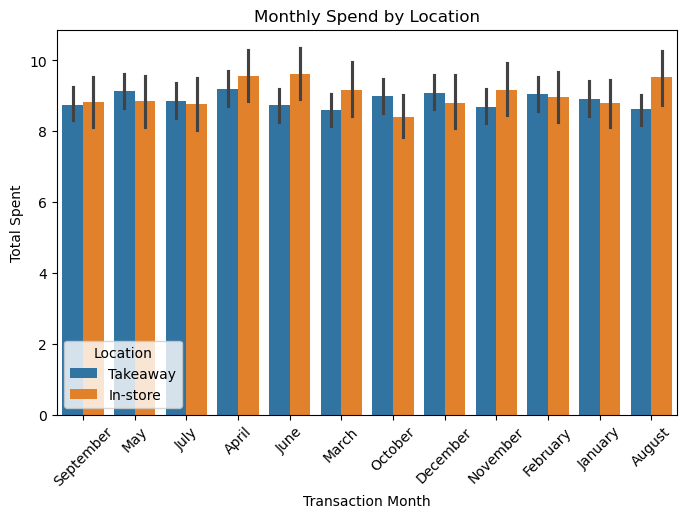

In [47]:
# Location + Month analysis
plt.figure(figsize=(8,5))
sns.barplot(x="Transaction Month", y="Total Spent", hue="Location", data=df)
plt.title("Monthly Spend by Location")
plt.xticks(rotation=45)
plt.show()

# Insights
- Takeaway spending is slightly higher than In-store in most months.
- Spending is steady across all months.
- Both locations show similar patterns every month.




# Hypothesis Testing

In [43]:
#One-sample t-test
#Check if the average spending is significantly different from a target value (say ₹200).
from scipy.stats import ttest_1samp
stat, p = ttest_1samp(df["Total Spent"], 200)
# Print hypotheses
print("Hypothesis Test: Average Spending vs ₹200")
print("Null Hypothesis (H₀): Average spending = ₹200")
print("Alternative Hypothesis (H₁): Average spending ≠ ₹200")
# Print test results
print(f"Test Statistic = {stat:.2f}")
print(f"p-value = {p:.4f}")
# Print conclusion
if p < 0.05:
    print("Conclusion: Reject the null hypothesis. Average spending is significantly different from ₹200.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference from ₹200.")

Hypothesis Test: Average Spending vs ₹200
Null Hypothesis (H₀): Average spending = ₹200
Alternative Hypothesis (H₁): Average spending ≠ ₹200
Test Statistic = -3262.29
p-value = 0.0000
Conclusion: Reject the null hypothesis. Average spending is significantly different from ₹200.


# Insights
- Average spending is not ₹200 — it's significantly different.
- The test statistic is very negative (-3262.29), suggesting actual spending is much lower than ₹200.
- p-value = 0.0000 → Strong evidence against the ₹200 assumption.

In [44]:
#Two-sample t-test (In-store vs Takeaway)
#Compare mean spending between two groups.
from scipy.stats import ttest_ind
instore = df[df["Location"] == "In-store"]["Total Spent"]
takeaway = df[df["Location"] == "Takeaway"]["Total Spent"]
stat, p = ttest_ind(instore, takeaway, equal_var=False)  # Welch's t-test
# Print hypotheses
print("Hypothesis Test: In-store vs Takeaway Spending")
print("Null Hypothesis (H₀): Mean spending is the same for In-store and Takeaway customers")
print("Alternative Hypothesis (H₁): Mean spending is different between In-store and Takeaway customers")
# Print test results
print(f"Test Statistic = {stat:.2f}")
print(f"p-value = {p:.4f}")
# Print conclusion
if p < 0.05:
    print("Conclusion: Reject the null hypothesis. Spending differs between In-store and Takeaway customers.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in spending between groups.")

Hypothesis Test: In-store vs Takeaway Spending
Null Hypothesis (H₀): Mean spending is the same for In-store and Takeaway customers
Alternative Hypothesis (H₁): Mean spending is different between In-store and Takeaway customers
Test Statistic = 1.12
p-value = 0.2629
Conclusion: Fail to reject the null hypothesis. No significant difference in spending between groups.


# Insights
- No significant difference in average spending between In-store and Takeaway customers.
- Test Statistic = 1.12, p-value = 0.2629 → well above the 0.05 threshold.
- This means the observed difference could easily be due to random variation.

In [46]:
#Chi-Square Test (Payment Method vs Location)
#See if there’s a relationship between Payment Method and Location.
from scipy.stats import chi2_contingency
import pandas as pd
# Chi-Square Test (Payment Method vs Location)
contingency = pd.crosstab(df["Payment Method"], df["Location"])
chi2, p, dof, expected = chi2_contingency(contingency)
# Print hypotheses
print("Hypothesis Test: Payment Method vs Location")
print("Null Hypothesis (H₀): Payment Method and Location are independent (no relationship)")
print("Alternative Hypothesis (H₁): Payment Method and Location are dependent (there is a relationship)")
# Print test results
print(f"Chi-Square Statistic = {chi2:.2f}")
print(f"p-value = {p:.4f}")
# Print conclusion
if p < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant relationship between Payment Method and Location.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant relationship between Payment Method and Location.")

Hypothesis Test: Payment Method vs Location
Null Hypothesis (H₀): Payment Method and Location are independent (no relationship)
Alternative Hypothesis (H₁): Payment Method and Location are dependent (there is a relationship)
Chi-Square Statistic = 1.18
p-value = 0.5555
Conclusion: Fail to reject the null hypothesis. No significant relationship between Payment Method and Location.


# Insights
- No significant relationship between Payment Method and Location.
- Chi-Square = 1.18, p-value = 0.5555 → way above the 0.05 threshold.
- This means customers choose payment methods similarly, whether they shop In-store or Takeaway.